# Import

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os.path
import math
import cv2
from tqdm import tqdm
import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.applications import vgg16

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Data Load

In [2]:
# !unzip -q data.zip; rm data.zip # colab code
!unzip -q data2.zip; rm data2.zip # colab code

In [29]:
# train_dir = './data/train/'
# test_dir = './data/test/'
train_dir = './data2/train/'
test_dir = './data2/test/'

In [58]:
cc = cv2.imread('/content/data2/test/0/221003_150821.jpg')
cc.shape

(430, 410, 3)

In [62]:
#initialized value  
width=400
height=400
number_of_batch=1 # the number of batch 

In [67]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale =1./255
#     validation_split=0.2
)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale =1./255
)

# flow_from_directory를 통해서 각 generator 생성
train_generator=train_gen.flow_from_directory(
    train_dir, # 경로 지정
    target_size=(height, width), # image size 지정
    batch_size=number_of_batch, # batch 개수 지정
    class_mode='categorical', # class mode 지정
    # color_mode='grayscale',
    # save_format='jpeg',
    # save_to_dir='/content/save',
    # save_prefix='new',
    shuffle = True
)
test_generator=test_gen.flow_from_directory(
    test_dir,
    target_size=(height, width),  
    batch_size=number_of_batch,
    class_mode='categorical',
    # color_mode='grayscale',
    shuffle=False
)
class_num = len(train_generator.class_indices)
print('class 개수 :',class_num)

Found 360 images belonging to 360 classes.
Found 360 images belonging to 360 classes.
class 개수 : 360


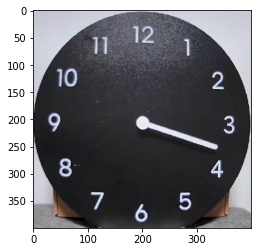

In [69]:
# 만들어진 trian generator 이미지 출력
x_train, y_train = train_generator.next()
for idx in range(1):  
    # print(x_train[idx]) # generator의 value 확인
    # print(y_train[idx])
    plt.imshow(x_train[idx]) 
    plt.show()

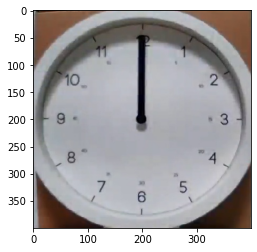

In [70]:
# 만들어진 test generator 이미지 출력
x_test, y_test = test_generator.next()
for idx in range(1):  
    # print(x_test[idx]) # generator의 value 확인
    # print(y_test[idx])
    plt.imshow(x_test[idx]) 
    plt.show()

# Model

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
resnet_model = ResNet50(weights=None, input_shape=(height, width, 3), include_top=False)
last = resnet_model.output
x = Flatten()(last)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output_layer = Dense(class_num, activation='softmax')(x)

resnet_model = Model(resnet_model.input, output_layer)
resnet_model.summary()

In [71]:
# AlexNet model 생성 
# conv2D -> batchNormalization -> maxpool2D 로 진행
resnet_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(height, width, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(360, activation='softmax')
])
resnet_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 98, 98, 96)        34944     
                                                                 
 batch_normalization_25 (Bat  (None, 98, 98, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 48, 48, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 48, 48, 256)       614656    
                                                                 
 batch_normalization_26 (Bat  (None, 48, 48, 256)      1024      
 chNormalization)                                                
                                                      

In [ ]:
model_path = 'resnet50_min_loss.h5'

# Loss Function

In [ ]:
def L1_loss(new_true_val, new_pred_val):
  pass

def min_loss(new_true_val, new_pred_val):
  pass

def sin_loss(new_true_val, new_pred_val): # sin Loss⇒sin((x2-x1)/2), 
  pass


def cos_loss(new_true_val, new_pred_val): # cos Loss⇒|-cos((x2-x1)/2)+1|
  pass

# Train

In [72]:
resnet_model.compile(optimizer=RMSprop(), loss='categorical_crossentropy') # loss='mse' optimizer='Adam'
history = resnet_model.fit(
    train_generator, 
    epochs=10,
)

# history = res_model.fit(
#     train_images, 
#     validation_data=val_images, 
#     epochs=100,
#     callbacks=[
#           tf.keras.callbacks.EarlyStopping(
#               monitor='val_loss',
#               patience=5,
#               restore_best_weights=True
#         )
#     ]
# )

Epoch 1/10
360/360 [==============================] - 29s 74ms/step - loss: 55.8156
Epoch 2/10
360/360 [==============================] - 27s 74ms/step - loss: 7.1590
Epoch 3/10
360/360 [==============================] - 27s 74ms/step - loss: 6.6352
Epoch 4/10
360/360 [==============================] - 27s 74ms/step - loss: 6.4217
Epoch 5/10
360/360 [==============================] - 27s 74ms/step - loss: 6.1431
Epoch 6/10
360/360 [==============================] - 27s 74ms/step - loss: 5.9991
Epoch 7/10
360/360 [==============================] - 26s 73ms/step - loss: 6.0583
Epoch 8/10
360/360 [==============================] - 27s 74ms/step - loss: 5.9974
Epoch 9/10
360/360 [==============================] - 26s 74ms/step - loss: 5.9618
Epoch 10/10
360/360 [==============================] - 27s 74ms/step - loss: 5.9610


In [ ]:
resnet_model.save(model_path)

# Result

In [25]:
real_y=test_generator.labels
real_y

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [26]:
test_generator.reset() # predict 이전에 reset 진행 
y_pred = resnet_model.predict(test_generator, verbose=1) # predict 진행
y_pred = np.argmax(y_pred, axis=1) # 가장 큰 값을 갖는 index 추출
print(len(y_pred))
y_pred

360/360 [==============================] - 2s 5ms/step
360


array([ 16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16, 233,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  16,  1

In [27]:
for i in range(10):
  print('idx :', i, ' y :', real_y[i], '  y_h :', y_pred[i])

idx : 0  y : 0   y_h : 16
idx : 1  y : 1   y_h : 16
idx : 2  y : 2   y_h : 16
idx : 3  y : 3   y_h : 16
idx : 4  y : 4   y_h : 16
idx : 5  y : 5   y_h : 16
idx : 6  y : 6   y_h : 16
idx : 7  y : 7   y_h : 16
idx : 8  y : 8   y_h : 16
idx : 9  y : 9   y_h : 16


In [ ]:
#For Classification
import pandas as pd
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
acc_score = accuracy_score(real_y, y_pred) * 100 # 정확도 계산

print('accuracy : ', acc_score) # 정확도 출력

accuracy :  0.2777777777777778


In [ ]:
cm = confusion_matrix(real_y, y_pred) # confusion_matrix 생성
classNames=sorted(os.listdir('./data/test')) # classNames 초기화
df_cm = pd.DataFrame(cm, index = [i for i in classNames], columns = [i for i in classNames]) # index, columns 지정해서 DataFrame 생성
len(classNames)

360

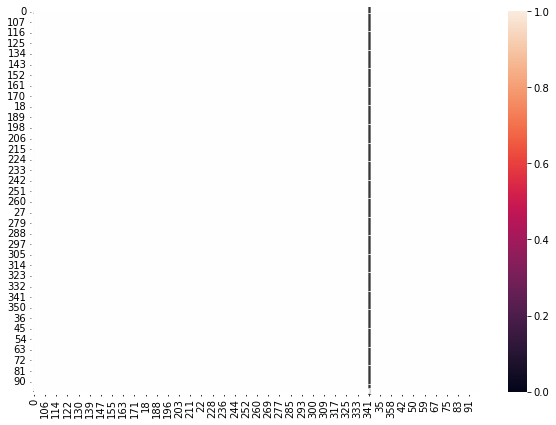

In [ ]:
# plt.figure(figsize = (10, 7)) # heatmap size 결정
# sn.heatmap(df_cm, annot=True) # heatmap 표시
# plt.savefig('./heatmap.png') # heatmap 저장

In [ ]:
prediction_value = np.squeeze(resnet_model.predict(test_generator))
true_value = test_generator.labels

rmse = np.sqrt(resnet_model.evaluate(test_generator, verbose=0))
print("Test RMSE : {:.5f}".format(rmse))

r2 = r2_score(true_value, prediction_value)
print("Test R^2 Score: {:.5f}".format(r2))

Test RMSE : 12.12843
Test R^2 Score: -2.31580


In [ ]:
# null_rmse = np.sqrt(np.sum((true_value - np.mean(true_value))**2) / len(true_value))
# print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

In [ ]:
import cv2
for i in range(10):
  temp = test_images.Filepath[i]
  print(temp, end="  ")
  img2 = cv2.imread(temp)
  # int -> float
  scalingFactor = 1/255.0
  # Convert unsigned int 8bit to float
  img2 = np.float32(img2)
  img2 = img2*scalingFactor
  print(img2.shape)
  # input layer 형식 맞추기
  img2 = cv2.resize(img2, (height, width))
  print(img2.shape)

  img2 = img2.reshape(-1, height, width,3)
  print(np.squeeze(resnet_model.predict(img2)))

data\test\30\0517.jpg  (60, 60, 3)
(200, 200, 3)
7.401151
data\test\300\0879.jpg  (60, 60, 3)
(200, 200, 3)
7.4048476
data\test\0\01125 - 복사본 (4).jpg  ()
(200, 200)


ValueError: cannot reshape array of size 40000 into shape (200,200,3)

# Model Save

In [ ]:
res_model.save('my_model_17.h5')